# WINE QUALITY ANALYSIS

## CSCI/MATH 608 Final Project 
### Author: Shambhavi Danayak  
### Student id: 012654513  
### Professor: Kathleen Isenegger

In [7]:
import zipfile
import os

zip_path = "wine+quality.zip"
extract_path = "wine_quality_data"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete. Files:")
os.listdir(extract_path)

Extraction complete. Files:


['winequality-red.csv',
 'winequality.names',
 '.ipynb_checkpoints',
 'winequality-white.csv']

## LOAD THE DATASET 
For this Project only Red wine dataset "winequality-red.csv" is being used

In [8]:
import pandas as pd

df = pd.read_csv(
    "wine_quality_data/winequality-red.csv",
    sep=';'
)

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## DATA PREPARATION

In [9]:
df.shape

(1599, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [13]:
wine_df = df.copy()
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## DESCRIPTIVE QUESTION

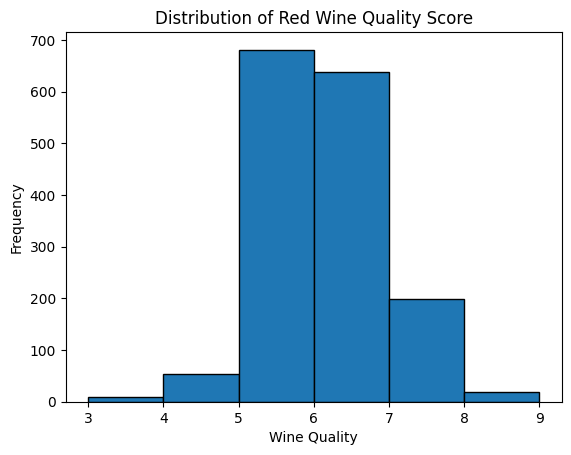

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['quality'], bins=range(df['quality'].min(), df['quality'].max() + 2),
         edgecolor='black')
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Red Wine Quality Score')
plt.show()

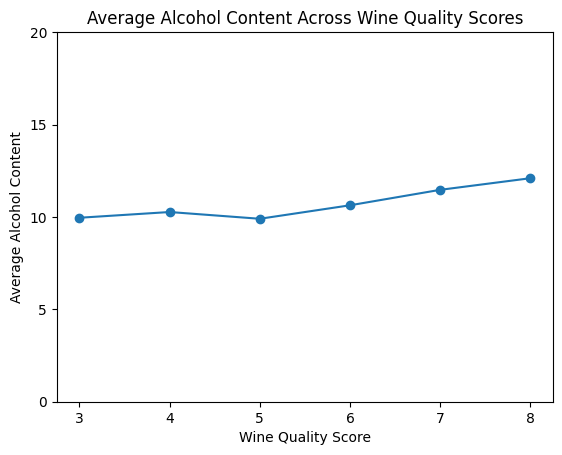

In [26]:
avg_alcohol_by_quality = df.groupby('quality')['alcohol'].mean()
plt.figure()
plt.plot(avg_alcohol_by_quality.index,
         avg_alcohol_by_quality.values,
         marker='o')
plt.xlabel('Wine Quality Score')
plt.ylabel('Average Alcohol Content')
plt.title('Average Alcohol Content Across Wine Quality Scores')
plt.ylim(0, max(avg_alcohol_by_quality.values) + 1)
plt.yticks(range(0, 21, 5))
plt.show()

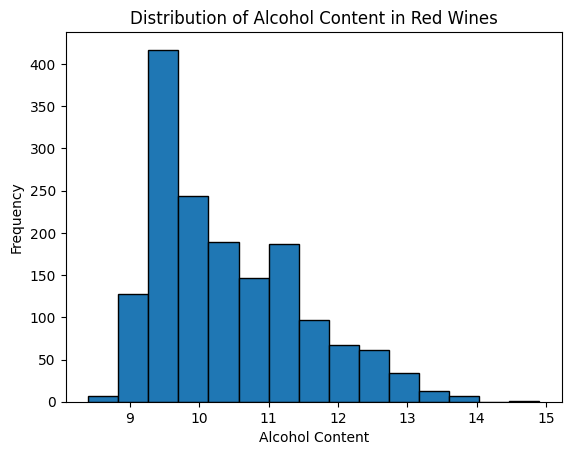

In [27]:
plt.figure()
plt.hist(df['alcohol'], bins=15, edgecolor='black')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.title('Distribution of Alcohol Content in Red Wines')
plt.show()

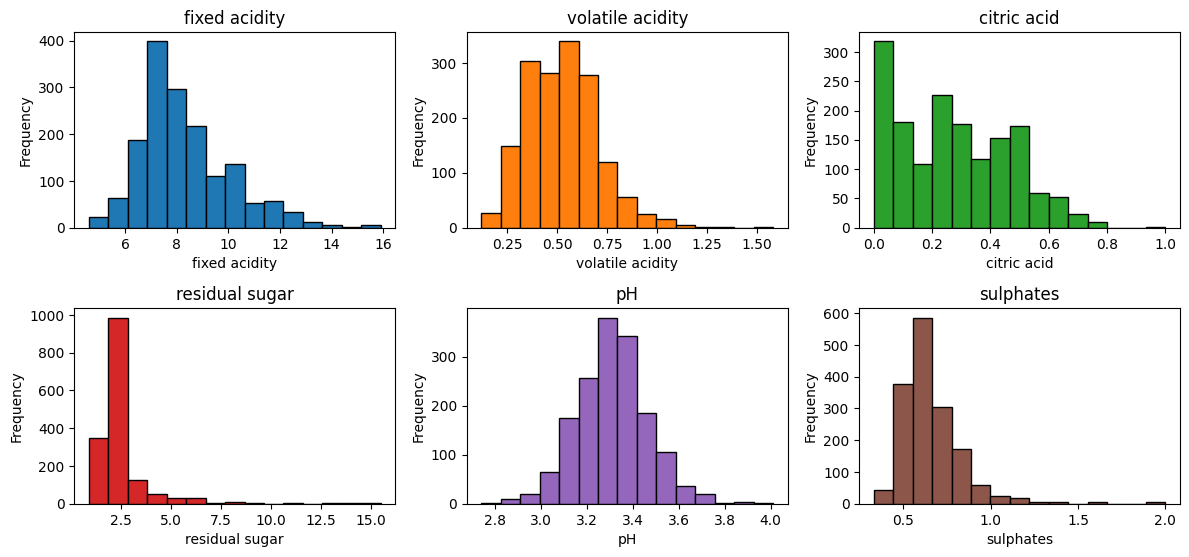

In [34]:

variables = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'pH',
    'sulphates'
]

colors = [
    'tab:blue',
    'tab:orange',
    'tab:green',
    'tab:red',
    'tab:purple',
    'tab:brown'
]
plt.figure(figsize=(12, 8))

for i, (var, color) in enumerate(zip(variables,colors),1):
    plt.subplot(3, 3, i)
    plt.hist(df[var], bins=15, edgecolor='black', color=color)
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## EXPLORATORY ANALYSIS

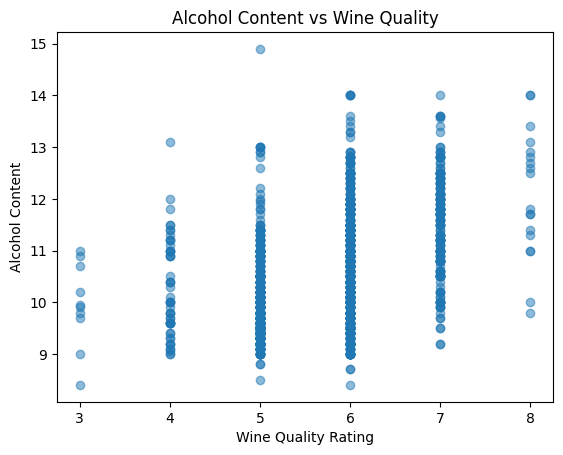

In [35]:
plt.figure()
plt.scatter(df['quality'], df['alcohol'], alpha=0.5)
plt.xlabel('Wine Quality Rating')
plt.ylabel('Alcohol Content')
plt.title('Alcohol Content vs Wine Quality')
plt.show()

In [36]:
corr = df.corr()

corr[['quality']].sort_values(by='quality', ascending=False)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


## PREDICTIVE ANALYSIS

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['alcohol', 'volatile acidity', 'fixed acidity', 'sulphates', 'pH']]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# train
model = LinearRegression()
model.fit(X_train, y_train)

# Print model intercept
print("Intercept:", model.intercept_)

# Print model coefficients
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Intercept: 2.6539471878754215
alcohol: 0.3203472696273629
volatile acidity: -1.0799479324136712
fixed acidity: 0.02463603927930521
sulphates: 0.5739210013748581
pH: -0.1142391709417869


In [39]:
y_pred = model.predict(X_test)

In [40]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.39976092465919083, 0.3882825701952938)

In [44]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual Quality': y_test.values,
    'Predicted Quality': y_pred
})

results_df

,Actual Quality,Predicted Quality
0,6,5.322861
1,5,5.237645
2,6,5.553164
3,5,5.435482
4,6,5.674995
...,...,...
315,6,5.718817
316,5,5.072176
317,5,5.294186
318,6,6.203200


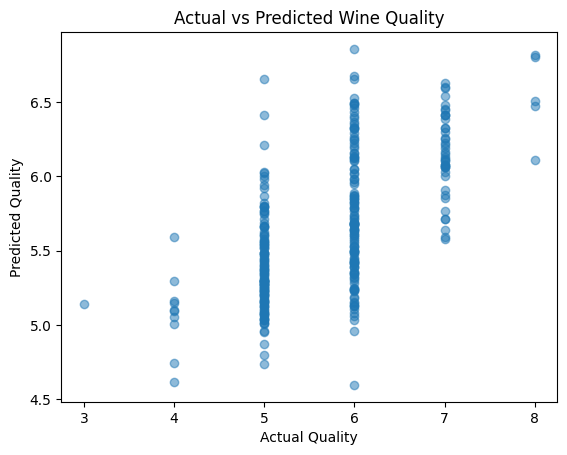

In [45]:
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.show()